In [4]:
import numpy as np
import matplotlib.pyplot as plt 
from ipywidgets import interactive
import seaborn as sns
plt.rcParams["figure.figsize"] = (20,10)

# 1 Visualize Regularization Contours

#### i)

In [5]:
def ridge(beta1, beta2):
    return beta1**2 + beta2**2

def lasso(beta1, beta2):
    return np.abs(beta1) + np.abs(beta2)

def ssq(beta1, beta2, x, y):
    beta = np.matrix([beta1, beta2])
    residuals = y - beta.T.dot(x)
    return residuals.dot(residuals.T)

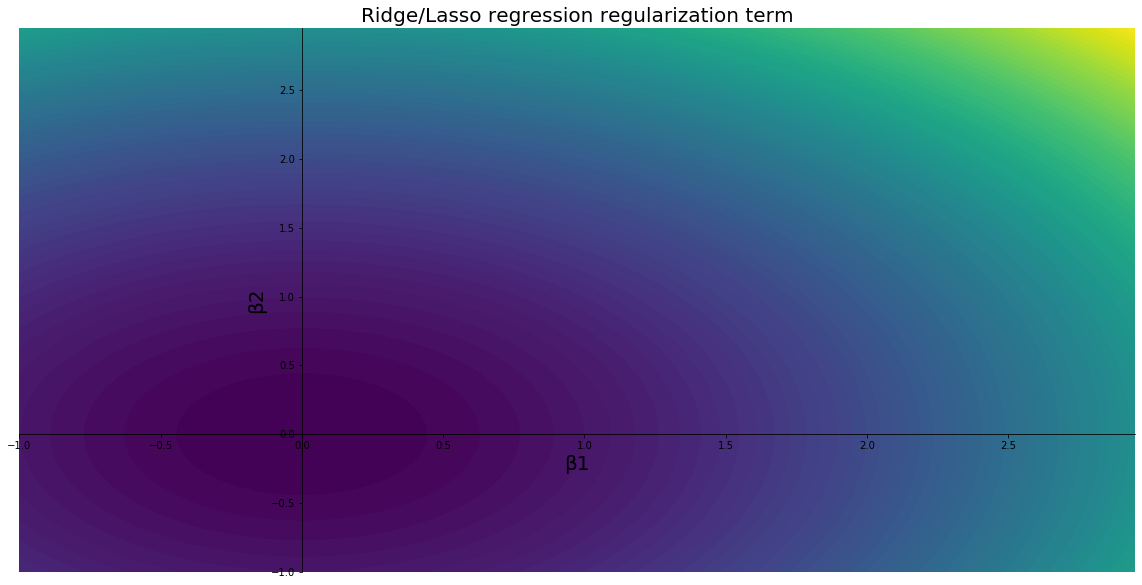

In [6]:
beta1 = np.arange(-1, 3, 0.05)
beta2 = np.arange(-1, 3, 0.05)
Beta1, Beta2 = np.meshgrid(beta1, beta2)
Ridge = ridge(Beta1, Beta2)
Lasso = lasso(Beta1, Beta2)
"""
for i in range(len(beta1)):
    for j in range(len(beta2)):
        if Ridge[i][j] > 1:
            Ridge[i][j] = 0.0


for i in range(len(beta1)):
    for j in range(len(beta2)):
        if Lasso[i][j] > 1:
            Lasso[i][j] = 0.0
"""           
plt.xlabel("β1", fontsize=20)
plt.ylabel("β2", fontsize=20)
ax = plt.gca()                                            

ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')        

ax.xaxis.set_ticks_position('bottom')   
ax.yaxis.set_ticks_position('left')          

ax.spines['bottom'].set_position(('data', 0))   
ax.spines['left'].set_position(('data', 0))

plt.contourf(Beta1, Beta2, Ridge, levels=100)
#plt.contourf(Beta1, Beta2, Lasso, levels=10)
plt.title("Ridge/Lasso regression regularization term", fontsize=20)
sns.despine()

#### ii)

In [7]:
tmp = np.load("sheet5-linreg1.npz")
X = (tmp["X"])  # 2*100
Y = (tmp["Y"])  # 1*100
beta11 = np.linalg.inv(X.dot(X.T)).dot(X).dot(Y.T)
print(beta11)

[[0.99565056]
 [1.99119897]]


In [8]:
beta1 = np.arange(-1, 3, 0.05)
beta2 = np.arange(-1, 3, 0.05)
b = np.linalg.inv(X.dot(X.T)).dot(X).dot(Y.T)
print(b)
Beta1, Beta2 = np.meshgrid(beta1, beta2)
B = np.vstack((Beta1.reshape(-1), Beta2.reshape(-1)))
SSQ = np.sum((B.T.dot(X) - Y)**2, axis=1).reshape(len(beta1), len(beta2))

[[0.99565056]
 [1.99119897]]


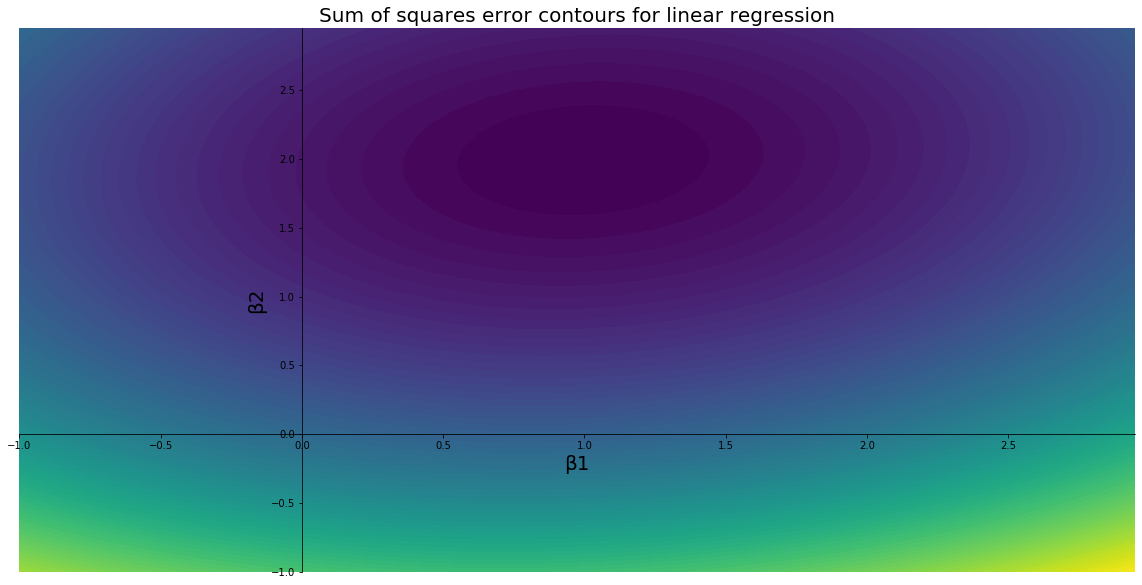

In [9]:
plt.xlabel("β1", fontsize=20)
plt.ylabel("β2", fontsize=20)
ax = plt.gca()                                            

ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')        

ax.xaxis.set_ticks_position('bottom')   
ax.yaxis.set_ticks_position('left')          

ax.spines['bottom'].set_position(('data', 0))   
ax.spines['left'].set_position(('data', 0))

plt.contourf(Beta1, Beta2, SSQ, levels=100)
plt.title("Sum of squares error contours for linear regression", fontsize=20)
sns.despine()

#### iii)

In [13]:
lamda = [10, 50, 100, 200, 300]
beta1 = np.arange(-1, 3, 0.05)
beta2 = np.arange(-1, 3, 0.05)
Beta1, Beta2 = np.meshgrid(beta1, beta2)
B = np.vstack((Beta1.reshape(-1), Beta2.reshape(-1)))
SSQ = np.sum((B.T.dot(X) - Y)**2, axis=1).reshape(len(beta1), len(beta2))
Ridge = ridge(Beta1, Beta2)


def f(reg):
    plt.contour(Beta1, Beta2, SSQ + reg*Ridge, levels=100)
    plt.axhline(0, color='black', linestyle='dashed', alpha=0.8)
    plt.axvline(0, color='black', linestyle='dashed', alpha=0.8)
    index = np.unravel_index(np.argmin(SSQ + reg*Ridge), SSQ.shape)
    plt.scatter(1, 2, color='red')
    plt.scatter(beta1[index[1]],beta2[index[0]], color="orange")

interactive(f, reg=(0,500, 20))

#plt.contour(Beta1, Beta2, Ridge)

interactive(children=(IntSlider(value=240, description='reg', max=500, step=20), Output()), _dom_classes=('wid…

In [16]:
beta1 = np.arange(-1, 3, 0.05)
beta2 = np.arange(-1, 3, 0.05)
Beta1, Beta2 = np.meshgrid(beta1, beta2)
B = np.vstack((Beta1.reshape(-1), Beta2.reshape(-1)))
SSQ = np.sum((B.T.dot(X) - Y)**2, axis=1).reshape(len(beta1), len(beta2))
Lasso = lasso(Beta1, Beta2)


def f(reg):
    plt.contour(Beta1, Beta2, SSQ + reg*Lasso, levels=100)
    plt.axhline(0, color='black', linestyle='dashed', alpha=0.8)
    plt.axvline(0, color='black', linestyle='dashed', alpha=0.8)
    index = np.unravel_index(np.argmin(SSQ + reg*Lasso), SSQ.shape)
    plt.scatter(1, 2, color='red')
    plt.scatter(beta1[index[1]],beta2[index[0]], color="orange")

interactive(f, reg=(0,500, 20))

interactive(children=(IntSlider(value=240, description='reg', max=500, step=20), Output()), _dom_classes=('wid…

In [24]:
tmp = np.load("sheet5-linreg2.npz")
X = np.matrix(tmp["X"])  # 2*100
Y = np.matrix(tmp["Y"])  # 1*100

(2, 100)


# 3 Fitting a 1D Gaussian Process

#### i)

In [33]:
tmp = np.load("gp-data.npz.")
X = (tmp["X"])  # 1*20
Y = (tmp["Y"])  # 1*20

[0.         0.44444444 0.88888889 1.33333333 1.77777778 2.22222222
 2.66666667 3.11111111 3.55555556 4.         5.         5.27777778
 5.55555556 5.83333333 6.11111111 6.38888889 6.66666667 6.94444444
 7.22222222 7.5       ]


In [25]:
def kernel(x, xp, lengthscale=1):
    return np.exp(-(x - xp)**2 / lengthscale)

def cov_matrix(x):
    cov_matrix = []
    for i in x:
        for j in x:
            cov_matrix.append(kernel(i, j, 1))
    cov_matrix = np.array(cov_matrix).reshape(len(x), len(x))
    return cov_matrix

In [26]:
Xseq = np.arange(0, 12, 0.1)
cov_matrix = cov_matrix(Xseq)

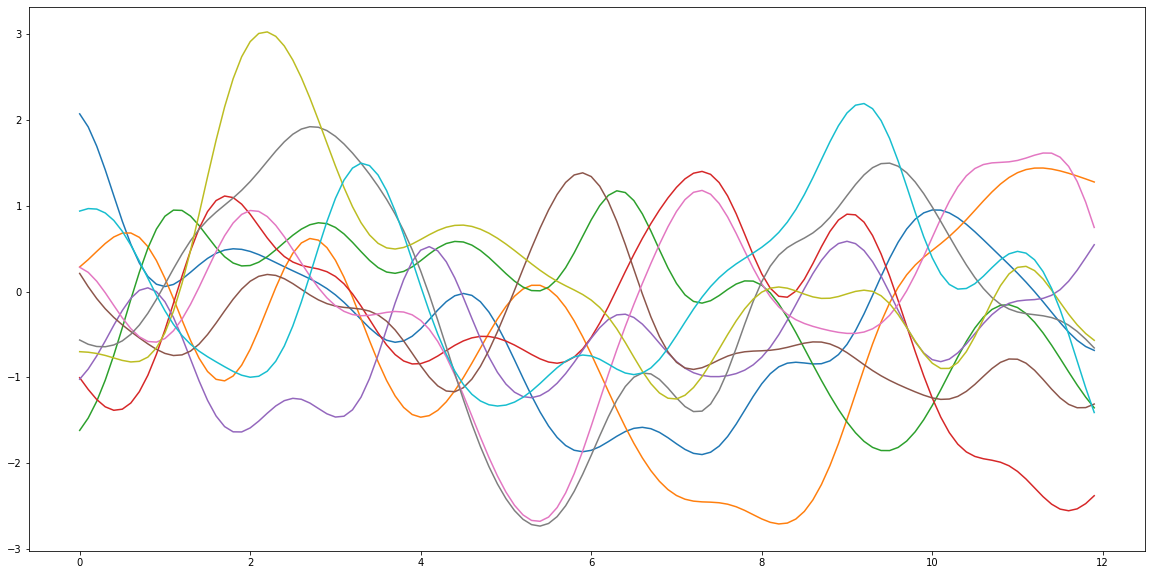

In [27]:
for i in range(10):
    Yseq = np.random.multivariate_normal(mean=np.zeros(len(Xseq)), cov=cov_matrix)
    plt.plot(Xseq, Yseq)

#### ii)

In [44]:
def fit_posterior(x_obs, y_obs, x_pre, l=1.0, noise=0.0001):
    cov_po = kernel(x_pre, x_obs, l)
    cov_op = cov_po.T
    cov_pp = kernel(x_pre, x_pre, l)
    cov_oo = cov_matrix(x_obs)
    inverse = inv(cov_oo + noise*np.eye(cov_oo.shape[0]))
    mean_pre = cov_po.dot(inverse).dot(y_obs)
    cov_pre = cov_pp - cov_po.dot(inverse).dot(cov_op)
    return mean_pre, cov_pre

In [45]:
index = np.random.permutation(20)[:10]
mean_pre, cov_pre = fit_posterior(Xseq, Y[index], X[index], 1.0, 0.0001)

ValueError: operands could not be broadcast together with shapes (10,) (120,) 

In [31]:
np.random.randint(0,20,10)

array([19,  5, 19,  2,  5, 18,  2,  2,  4, 18])